# Example Finance EDA

Using a Kaggle dataset of synthetic  personal finances

### Key goals to explore in this project 📌


-Graph Expenses to vizualise how money is being spent\
-Line graph to see trends over time\
-Comparing Expenses to Income\
-Monthly net balance: Income-Expenses\
-Future Projections

Date: The date of the transaction, spanning from January 1, 2020, to December 31, 2024.

## 1️⃣ Load the Data 🗂️

In this section, we’ll import the necessary libraries and load the dataset to begin our analysis.


In [38]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load CSV file

df = pd.read_csv('c:\projects\Finance CSV EDA\Personal_Finance_Dataset.csv')

#Quick look at the columns and data we're using

df.head()

,Date,Transaction Description,Category,Amount,Type
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense


## 2️⃣ Clean data 🧹

Make sure theres no missing entries and change salary from type expense to income. Also we will drop the 'Transaction Description' Column as we never use this.

In [39]:
#use.drop('Transaction Description') to remove column
df= df.drop(['Transaction Description'],axis=1)

In [40]:
#see if theres is any missing data entries
df.isna().sum()


Date        0
Category    0
Amount      0
Type        0
dtype: int64

In [41]:
#Change all salary entries from expense to income
df.loc[df['Category'] == 'Salary', 'Type'] = 'Income'

Confirmed no missing data. Now we can start analysis

## 3️⃣ Visualize Total Expenses 📊

Using a pie graph will allow us to see where expenses are going\
Let's filter out Income under the type column for now

<function matplotlib.pyplot.show(close=None, block=None)>

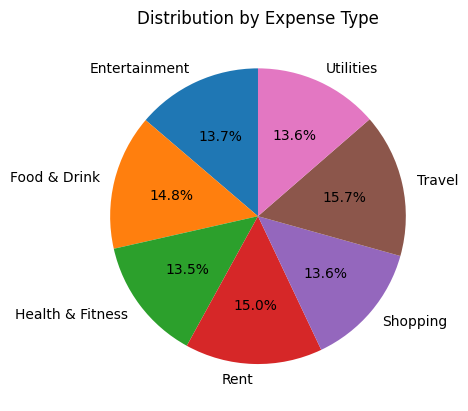

In [42]:
#Filter 'Type' column to only show Expenses

expenses = df[df['Type'] == 'Expense']

#Create a grouped df to plot with a pie graph

grouped_expenses = expenses.groupby('Category')['Amount'].sum()
grouped_expenses.plot.pie(autopct='%.1f%%', startangle= 90, labels=grouped_expenses.index)
plt.title("Distribution by Expense Type")
plt.ylabel('')
plt.show


As show in the pie chart, expenses are evenly distributed with the largest and smallest expense types being within 2.2% of eachother.\
Salary being listed as an expence seems odd at first, however, an assumption is being made that this refers to job related expenses - uniform, tools ect

## 4️⃣ Expense Trends Over Time 📈

Lets use the previously created expenses dataframe to analyse spending trends over time. We're not too concerened with type so the created 'expenses' dataframe will be perfect.\
However, we will need to create a new month column based off the expense date.

In [43]:
#Lets see what data type each column is

expenses.dtypes
expenses.head(5)

,Date,Category,Amount,Type
0,2020-01-02,Food & Drink,1485.69,Expense
1,2020-01-02,Utilities,1475.58,Expense
2,2020-01-04,Rent,1185.08,Expense
4,2020-01-13,Food & Drink,1126.88,Expense
5,2020-01-14,Shopping,448.68,Expense


In [44]:
#Change Date to string so we can use .split method on it and retrieve the month and add that to a new column
#Make a copy of expenses df so we don't damage previous data using this df
expenses = expenses.copy()
expenses['Date'] = expenses['Date'].astype(str)
expenses['Expense_Month'] = expenses['Date'].str.split('-').str.get(1).astype(int)

#Check if new 'Expense_Month' worked
expenses.sample(n=10)

,Date,Category,Amount,Type,Expense_Month
45,2020-03-11,Rent,1956.19,Expense,3
1470,2024-11-20,Health & Fitness,385.26,Expense,11
735,2022-07-04,Rent,1006.58,Expense,7
926,2023-02-18,Entertainment,309.63,Expense,2
946,2023-03-10,Rent,323.65,Expense,3
517,2021-10-13,Health & Fitness,1339.00,Expense,10
918,2023-02-07,Food & Drink,366.90,Expense,2
1176,2023-12-06,Rent,871.37,Expense,12
86,2020-05-17,Rent,155.79,Expense,5
183,2020-09-06,Shopping,799.34,Expense,9


Expense month column has been added, now we can start plotting monthly trends. 📈

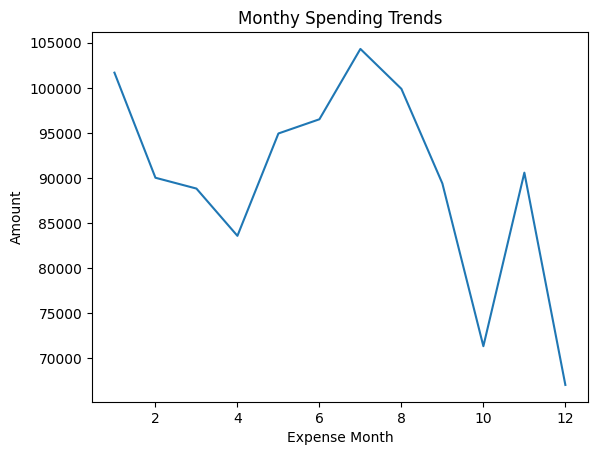

In [45]:
monthly_grouped_expenses = expenses.groupby('Expense_Month')['Amount'].sum()
#monthly_grouped_expenses.plot.line(lables=monthly_grouped_expenses.index)
sns.lineplot(data=monthly_grouped_expenses)
plt.title('Monthy Spending Trends')
plt.xlabel('Expense Month')
plt.show()

### 🔍 Insight

As shown, we see expenses peak in the 7th month July, with them being at their lowest at the end of the year.\

It would be interesting to see income trend as a hue on this graph! Let's do that.

Using the original df created from the csv, we'll add a month column and group by type with amount sum.

In [46]:
#create a copy just in case
df = df.copy()
#using the same code from  to add month column
df['Date'] = df['Date'].astype(str)
df['Month'] = df['Date'].str.split('-').str.get(1).astype(int)
#make sure column was added properly
df.sample(n=10)

,Date,Category,Amount,Type,Month
641,2022-03-28,Other,4762.00,Income,3
409,2021-05-19,Investment,1921.00,Income,5
314,2021-01-29,Utilities,521.37,Expense,1
1468,2024-11-19,Salary,606.22,Income,11
422,2021-05-31,Entertainment,649.84,Expense,5
964,2023-03-27,Investment,2033.00,Income,3
286,2020-12-26,Investment,2423.00,Income,12
1241,2024-02-17,Other,546.00,Income,2
1218,2024-01-19,Health & Fitness,1423.60,Expense,1
1246,2024-02-22,Entertainment,1914.41,Expense,2


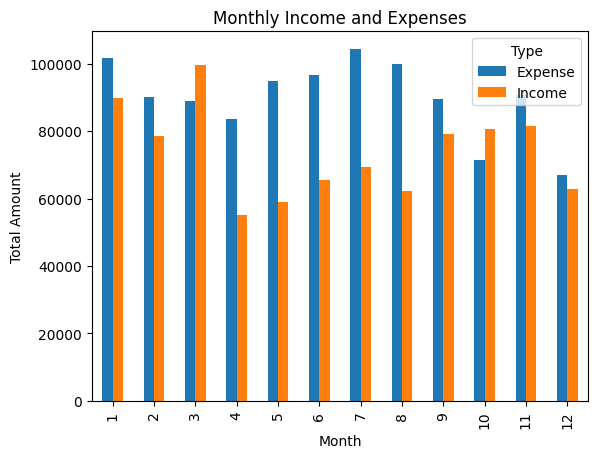

In [47]:
#group data by type, then monthly amount sum
grouped_entries = df.groupby(['Type', 'Month'])['Amount'].sum()

#unstack grouped_entries df so we can plot it using matplotlib
grouped_entries = grouped_entries.unstack('Type')
grouped_entries.plot(kind='bar')

#plot both expense and income
plt.title('Monthly Income and Expenses')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend(title='Type')
plt.show()

### 🔍 Insight

This person is commonly spending much more than they earn. They are either bad spenders in credit debt or hopefully, they have missed entering their income.

## 5️⃣ Monthly Net Balance: Income - Expense 🕒

Let's see exactly how much debt this person has accumulated over this 4 year period\
From the dataframe, lets add a 'Year' column then we'll groupby year, month and type.\
After this we will apply a lambda function to go through each row and subrtract\
expense from income, which we will find the sum of.

In [48]:
df.head()

,Date,Category,Amount,Type,Month
0,2020-01-02,Food & Drink,1485.69,Expense,1
1,2020-01-02,Utilities,1475.58,Expense,1
2,2020-01-04,Rent,1185.08,Expense,1
3,2020-01-05,Investment,2291.00,Income,1
4,2020-01-13,Food & Drink,1126.88,Expense,1


In [49]:
#create 'Year' column using date column with str.split().
df['Year'] = df['Date'].str.split('-').str.get(0)
#check it worked
df.sample(n=5)

,Date,Category,Amount,Type,Month,Year
357,2021-03-22,Investment,1038.00,Income,3,2021
808,2022-09-21,Utilities,1629.34,Expense,9,2022
1098,2023-09-04,Travel,1814.75,Expense,9,2023
442,2021-06-28,Rent,1020.30,Expense,6,2021
1373,2024-08-01,Food & Drink,1451.74,Expense,8,2024


Yearly income and expenses broken into months

In [50]:
#Groupby year, month then type and sum of amount, then unstack so we can apply a lambda function later
yearly_df = df.groupby(['Year', 'Month', 'Type'])['Amount'].sum().unstack()
#Ensure this worked
yearly_df.sample(n=5)

Type         Expense    Income
Year Month                    
2022 12     11487.82   4047.48
     5      25644.12  18016.93
2024 1      26896.85  25993.28
     5      14511.28   5607.28
2021 6      20155.57   7581.06

In [51]:
#Apply Lambda function to each row that will subtract expense from income
#result = dataframe.apply(lambda row: row['attribute1'] - row['attribute2'], axis=1)
yearly_df['Income-Expense'] = yearly_df.apply(lambda row: row['Income'] - row['Expense'], axis=1)
#Ensure this worked
yearly_df.head()

Type         Expense    Income  Income-Expense
Year Month                                    
2020 1      16061.16   6655.09        -9406.07
     2      16814.10  20364.31         3550.21
     3      13581.81   3465.00       -10116.81
     4      14010.45   9592.60        -4417.85
     5      16528.08   6326.05       -10202.03

In [52]:
#Apply .sum() to 'Income-Expense' Column to see whether this person is positive or negative overall
yearly_df['Income-Expense'].sum()

np.float64(-195000.27)

### 🔍 Insight

This person is in alot of debt. At a total of -195000.27 in just 5 years.\
Lets graph this trend by year to aid our projection for the coming year if nothing changes.

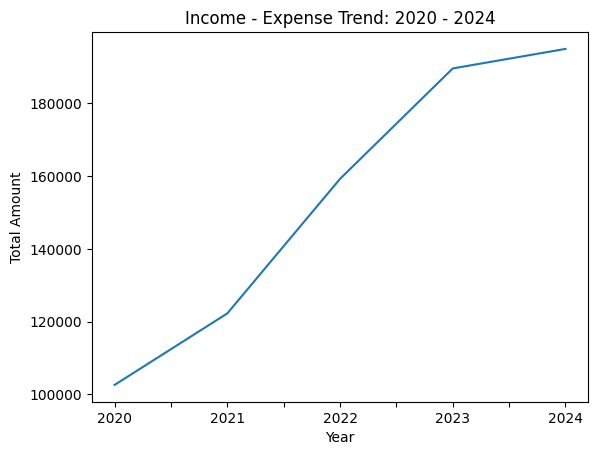

In [53]:
#Sum by year then use cumsum(cumulative sum) to see running total trend over the years

yearly_expense =yearly_df.groupby(['Year'])['Income-Expense'].sum()
yearly_expense = -yearly_expense   # flip signs
yearly_cumsum = yearly_expense.cumsum()   # store the cumulative sum!
yearly_cumsum = yearly_cumsum.sort_index()
yearly_cumsum.cumsum()

yearly_cumsum.plot(kind='line')

plt.title('Income - Expense Trend: 2020 - 2024')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()


In [54]:
#Mean debt accrued per year
yearly_expense.mean()

np.float64(39000.054000000004)

### 🔍 Insight

This person has accrued $195000 worth of debt in 5 years, Averaging to $39000 debt per year.\
If nothing changes, this person will have $243000 worth of debt in a year\
and $390000 worth of debt in 5 years time.


## In Summary 📝

This person's expenses are pretty evenly distributed, with a 2.2% difference from the largest expense category to the smallest.\
Upon graphing monthly spending trends, it can be seen that this person spends the most during July, with a close second at the\
start of the year, while spending the least at the very end of the year.\

After overlaying income on top of the expense trend, we can see that this person spends alot more than they make.\
Delving into this by adding a new column that subracts expense from income for each month, then calculating the sum\
of this column, we find this person is $195000 in debt in just 5 years. This means on average, per year they accrue\
$39000 of debt per year. Therefore, if nothing changes, in a year they will be in $243000 worth of debt, and in 5 years\
they will be in $390000 worth of debt